In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pdb;
import time
import copy
from numpy import cos,sin,pi

from my_lib import *

%load_ext autoreload

%autoreload 2

In [2]:
actuation_noise_std = np.ones((2,))*0.05*60

measurement_noise_std = np.array([0.01,0.01,4.98e-5,1.25e-5]) #np.ones((4,))*1e-5

measure_noise_cov = np.diag(measurement_noise_std)
state_noise_cov = np.diag(measurement_noise_std)

/home/samer/Documents/Subjects/2019 Fall/ECE 2019 AS - Computational Robotics/ece_209as_lab3/my_lib.py:62: RuntimeWarning: divide by zero encountered in double_scalars
  get_dist_y = lambda x :  [(x - state[1])/ np.sin(state[2]), (x - state[1])/ np.sin(state[2]+pi/2)]


MSE [0.00181272 0.00293959 0.01061311]
MSE [0.00206181 0.0050331  0.01061311]


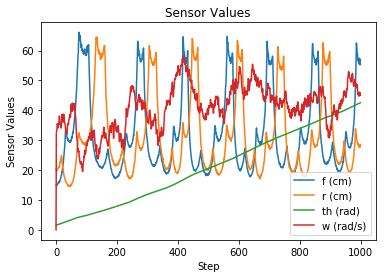

<Figure size 432x288 with 0 Axes>

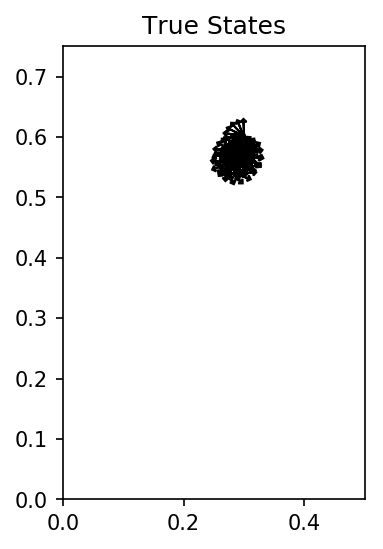

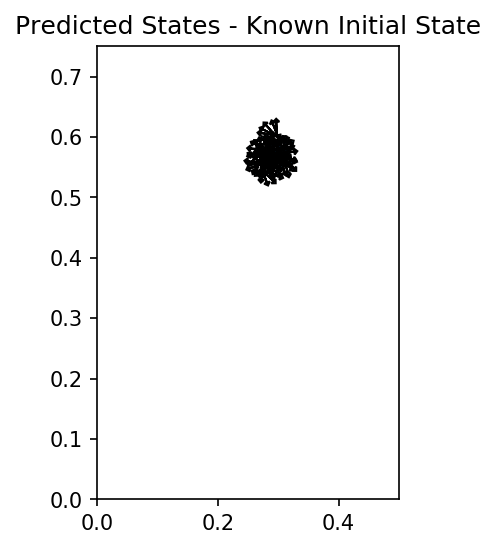

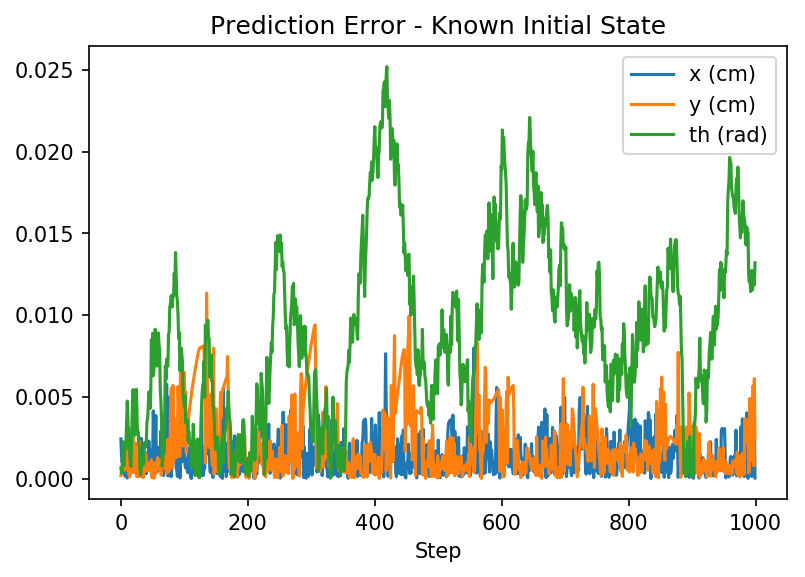

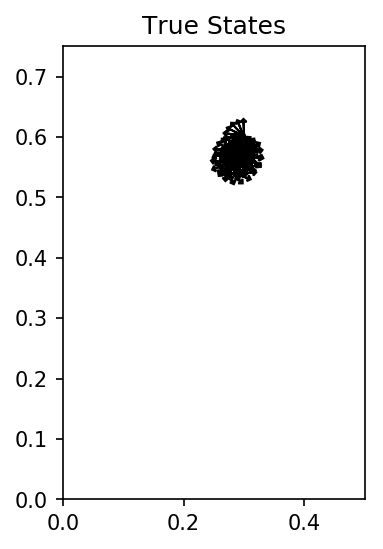

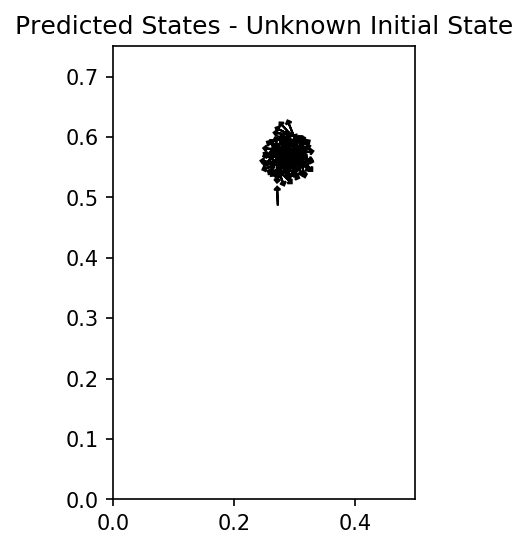

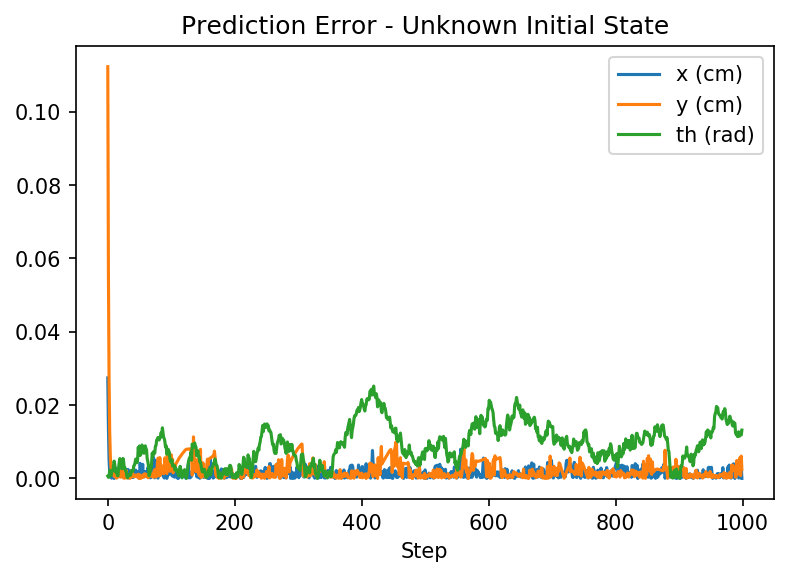

In [3]:
def calc_mse(state_seq,pred_states2):
    m_state_seq = np.array(state_seq)
    m_pred_states2 =np.array(pred_states2)
#     print(m_pred_states2[:,0:3].shape)
    mse = np.sqrt(np.mean( (m_pred_states2[:,0:3] - m_state_seq[:,0:3,])**2,axis = 0))
    return mse

def generate_measurement(init_state,control_seq,seed = 0):
    np.random.seed(seed)
    state_seq,obs_seq = trace_traj(init_state,control_seq,actuation_noise_std,measurement_noise_std)
    return state_seq,obs_seq

def eval_one_traj(control_seq,init_state,obs_seq, seed =0, plot = True):
    
    init_cov = np.zeros((4,4))
    actuation_noise_cov = np.diag(actuation_noise_std)**2
    measure_noise_cov = np.diag(measurement_noise_std)**2

    pred_states2 = apply_kalman2(obs_seq,control_seq,init_state,init_cov,actuation_noise_cov,measure_noise_cov,spreading = 3)
    
    plt.plot(np.array(obs_seq*np.array([[100,100,1,1]])))
    plt.legend(['f (cm)','r (cm)','th (rad)','w (rad/s)'])
    plt.xlabel("Step")
    plt.ylabel("Sensor Values")
    plt.title("Sensor Values")
    plt.figure()

    if plot:
        plot_state_seq(state_seq,10)
        plt.title("True States")
        plot_state_seq(pred_states2,10)
        plt.title("Predicted States - Known Initial State")
        eval_states2(pred_states2,state_seq)
        plt.title("Prediction Error - Known Initial State")
        plt.xlabel("Step")
        print("MSE" , calc_mse(state_seq,pred_states2))
    return (state_seq,pred_states2)


def eval_one_traj_unknown(control_seq,obs_seq, plot = True):
    
    init_cov = np.diag(np.ones((4,)))*1
    actuation_noise_cov = np.diag(actuation_noise_std)**2
    measure_noise_cov = np.diag(measurement_noise_std)**2
    
#     plt.figure()
#     plt.plot(np.array(obs_seq))
#     plt.legend(['f','r','th','w'])
    

    
    pred_states2 = apply_kalman2(obs_seq,control_seq,[W/2,L/2,0,0],init_cov,actuation_noise_cov,measure_noise_cov,spreading = 3)
   
    if plot:
        plot_state_seq(state_seq,10)
        plt.title("True States")
        plot_state_seq(pred_states2,10)
        plt.title("Predicted States - Unknown Initial State")
        eval_states2(pred_states2,state_seq)
        plt.title("Prediction Error - Unknown Initial State")
        plt.xlabel("Step")
        print("MSE" , calc_mse(state_seq,pred_states2))
    return (state_seq,pred_states2)


control_seq = [[-60,60]]*1000
init_state = [0.30,0.6,0,0]
state_seq,obs_seq = generate_measurement(init_state,control_seq,seed = 5)

eval_one_traj(control_seq,init_state,obs_seq);
eval_one_traj_unknown(control_seq,obs_seq);

/home/samer/Documents/Subjects/2019 Fall/ECE 2019 AS - Computational Robotics/ece_209as_lab3/my_lib.py:62: RuntimeWarning: divide by zero encountered in double_scalars
  get_dist_y = lambda x :  [(x - state[1])/ np.sin(state[2]), (x - state[1])/ np.sin(state[2]+pi/2)]


MSE [0.00201299 0.00373079 0.01087123]
MSE [0.00222835 0.00553261 0.01087123]


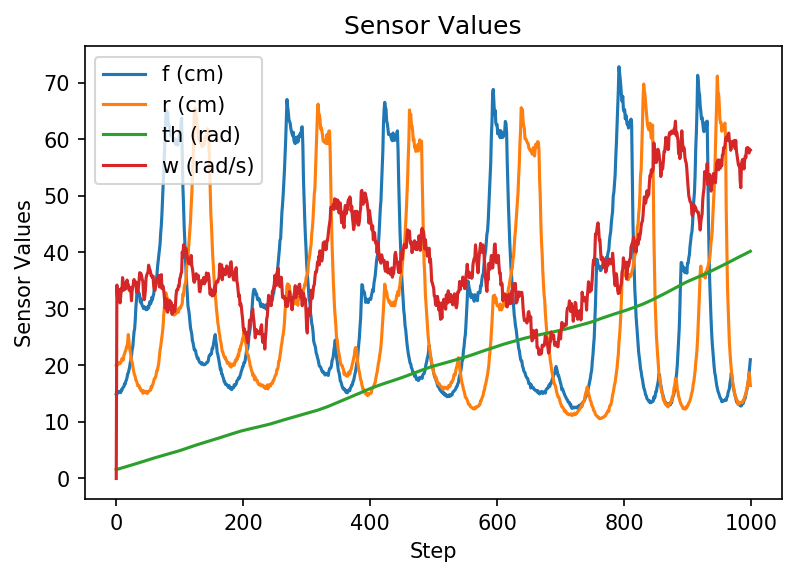

<Figure size 900x600 with 0 Axes>

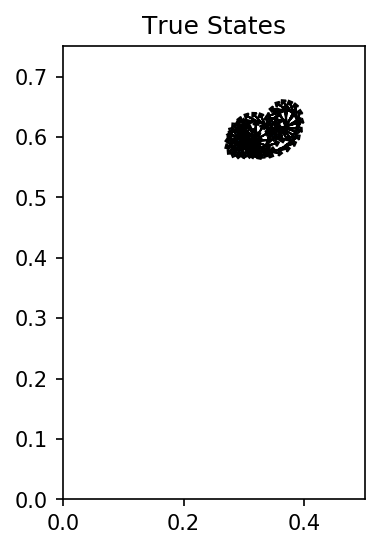

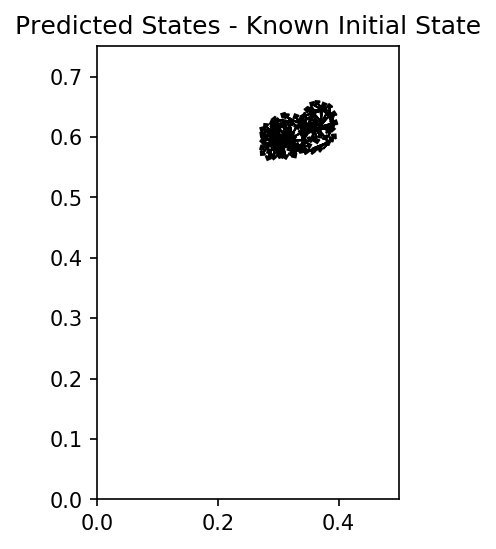

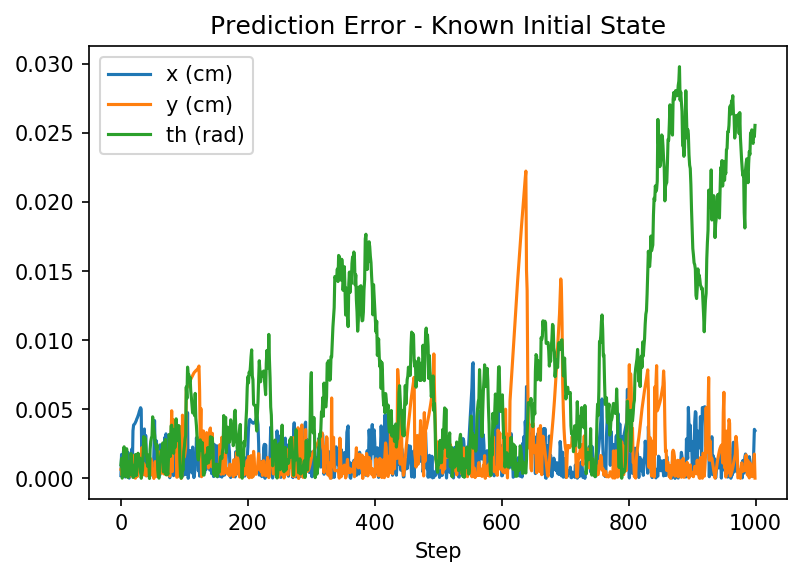

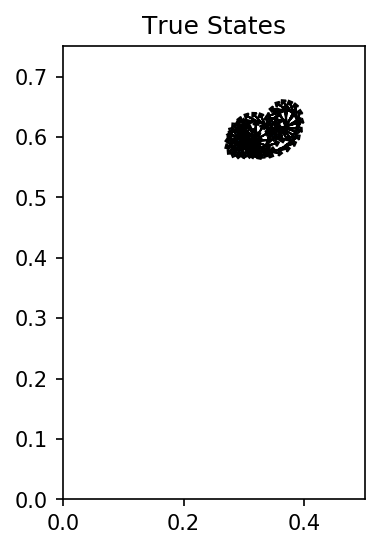

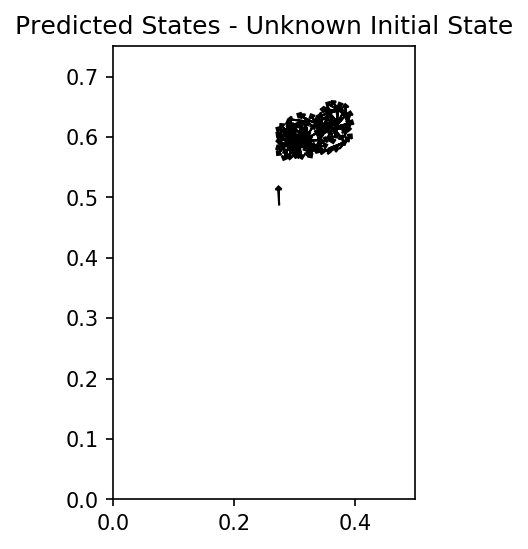

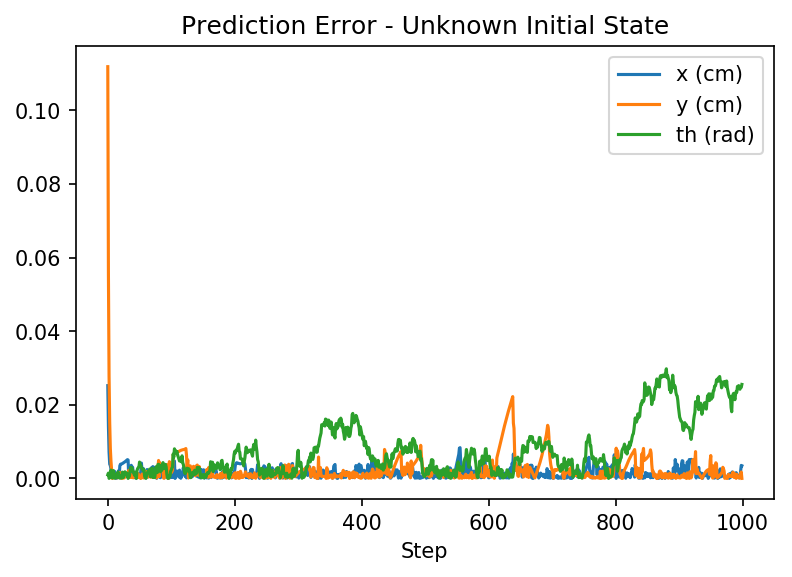

In [4]:
control_seq = [[-60,60]]*1000
init_state = [0.30,0.6,0,0]
state_seq,obs_seq = generate_measurement(init_state,control_seq,seed = 6)
eval_one_traj(control_seq,init_state,obs_seq);
eval_one_traj_unknown(control_seq,obs_seq);

MSE [0.00222295 0.00197566 0.00331467]
MSE [0.02858502 0.00447242 0.00331435]


/home/samer/Documents/Subjects/2019 Fall/ECE 2019 AS - Computational Robotics/ece_209as_lab3/my_lib.py:62: RuntimeWarning: divide by zero encountered in double_scalars
  get_dist_y = lambda x :  [(x - state[1])/ np.sin(state[2]), (x - state[1])/ np.sin(state[2]+pi/2)]


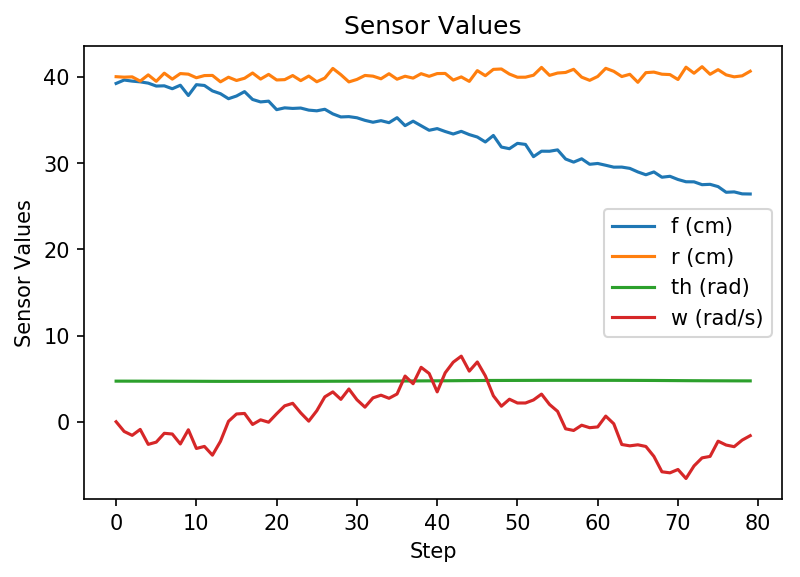

<Figure size 900x600 with 0 Axes>

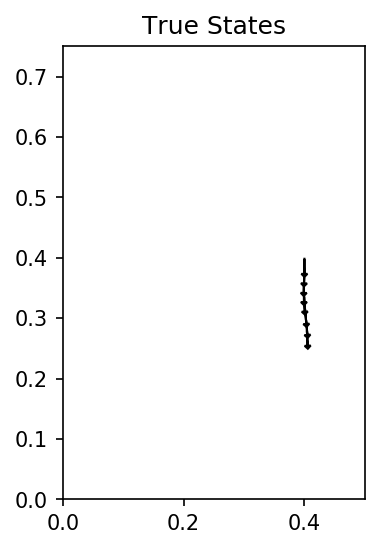

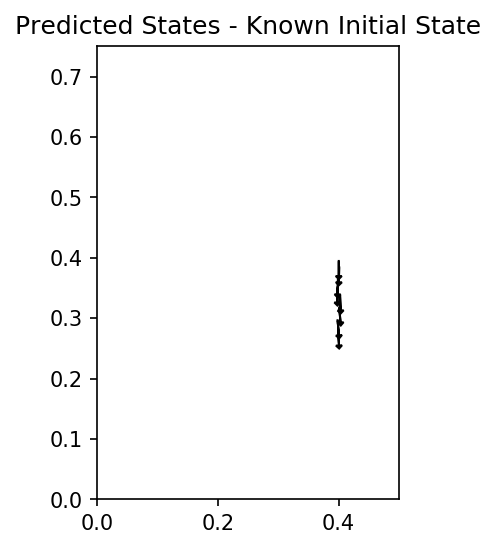

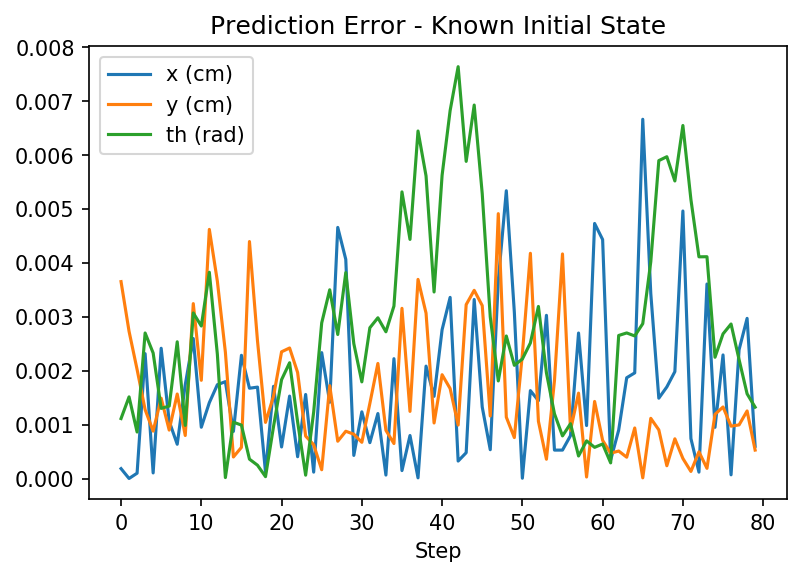

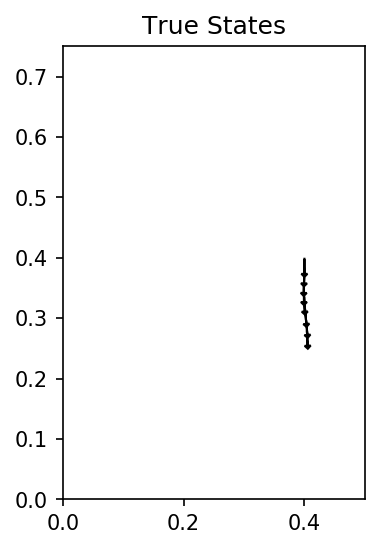

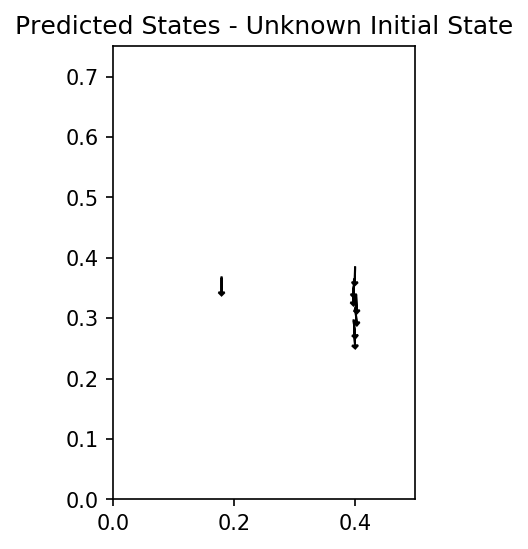

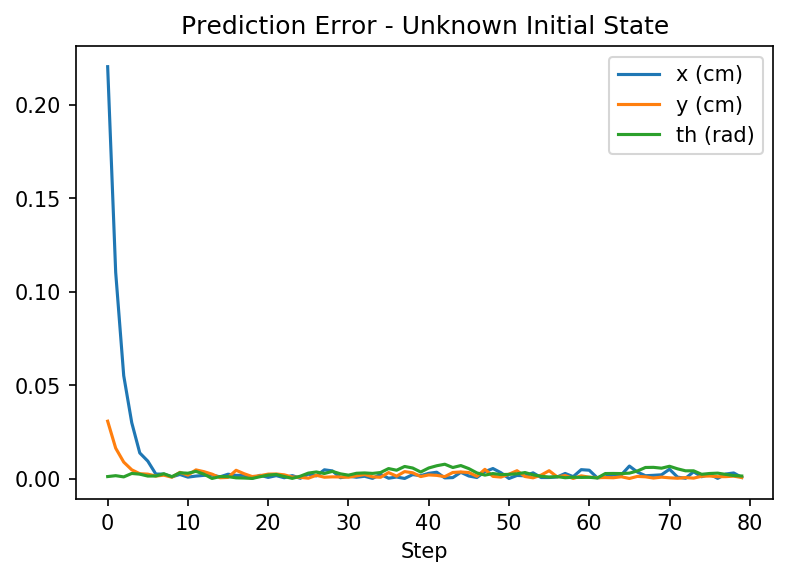

In [5]:
control_seq = [[60,60]]*80
init_state = [0.4,0.4,pi,0]
state_seq,obs_seq = generate_measurement(init_state,control_seq,seed = 3)
eval_one_traj(control_seq,init_state,obs_seq);
eval_one_traj_unknown(control_seq,obs_seq);

/home/samer/Documents/Subjects/2019 Fall/ECE 2019 AS - Computational Robotics/ece_209as_lab3/my_lib.py:62: RuntimeWarning: divide by zero encountered in double_scalars
  get_dist_y = lambda x :  [(x - state[1])/ np.sin(state[2]), (x - state[1])/ np.sin(state[2]+pi/2)]


MSE [0.00242537 0.00597354 0.01363011]
MSE [0.00766897 0.00688562 0.01363012]


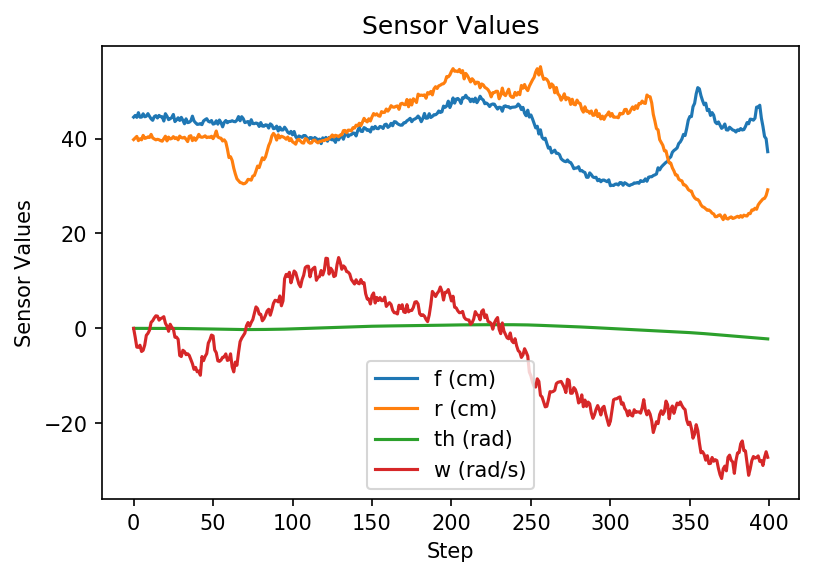

<Figure size 900x600 with 0 Axes>

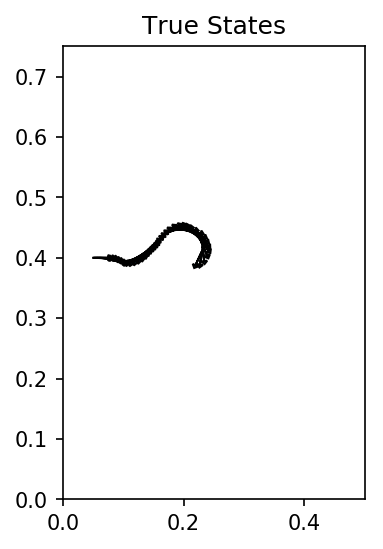

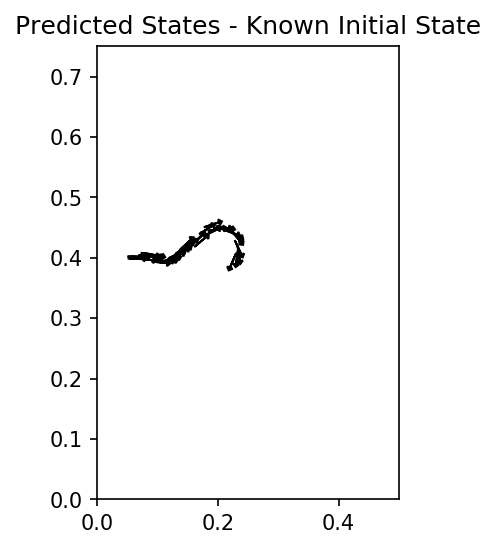

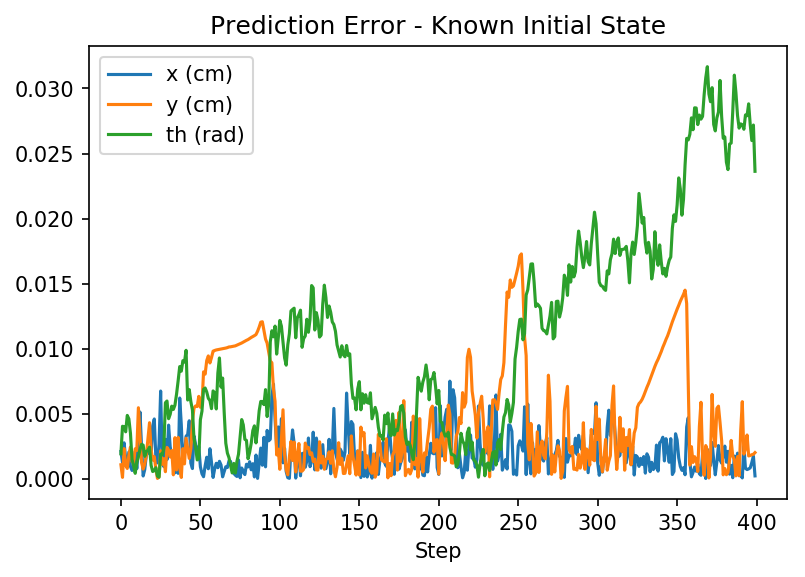

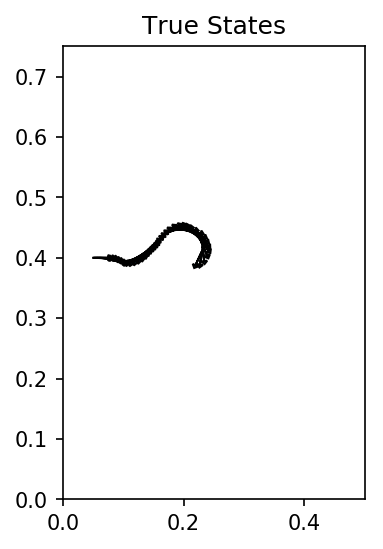

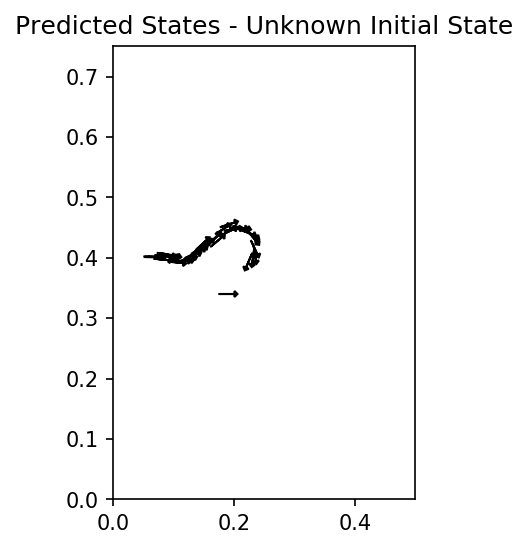

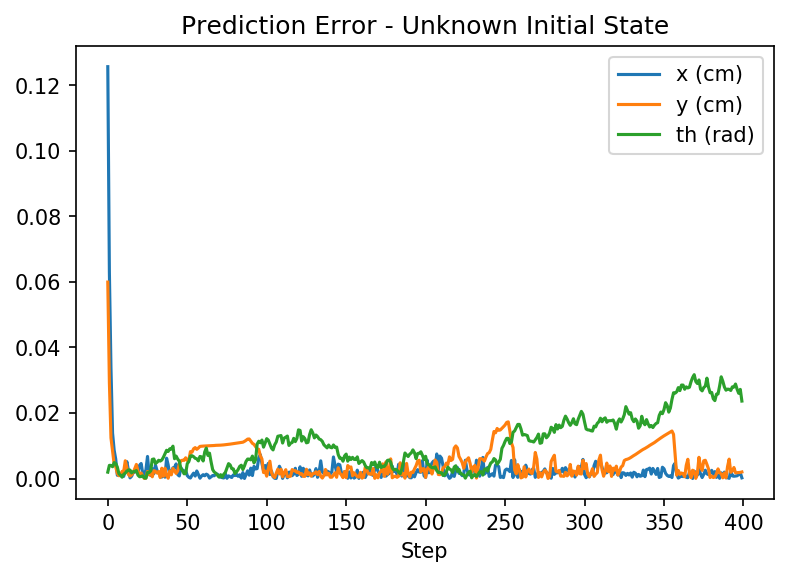

In [17]:
control_seq = [[6,6]]*400
init_state = [0.05,0.4,-pi/2,0]
state_seq,obs_seq = generate_measurement(init_state,control_seq,seed = 1)
eval_one_traj(control_seq,init_state,obs_seq);
eval_one_traj_unknown(control_seq,obs_seq);

MSE [0.00380727 0.00305434 0.02068552]


/home/samer/Documents/Subjects/2019 Fall/ECE 2019 AS - Computational Robotics/ece_209as_lab3/my_lib.py:62: RuntimeWarning: divide by zero encountered in double_scalars
  get_dist_y = lambda x :  [(x - state[1])/ np.sin(state[2]), (x - state[1])/ np.sin(state[2]+pi/2)]


MSE [0.01055819 0.00362752 0.02068552]


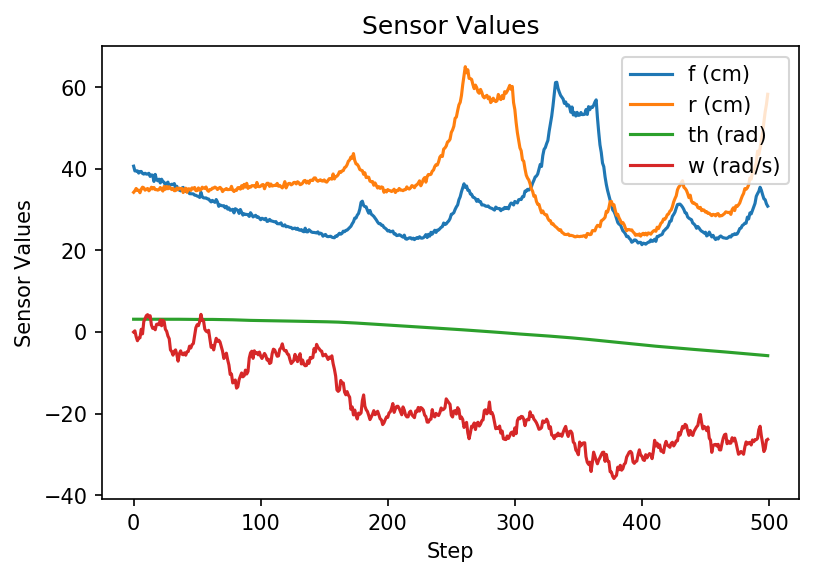

<Figure size 900x600 with 0 Axes>

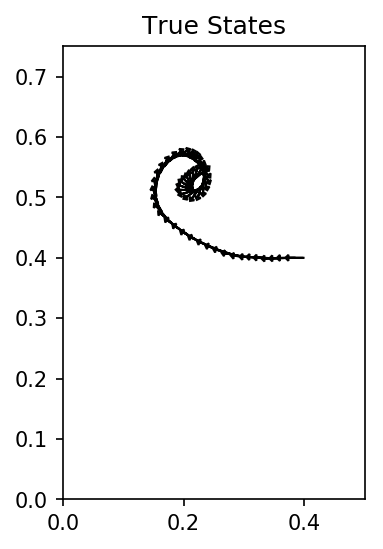

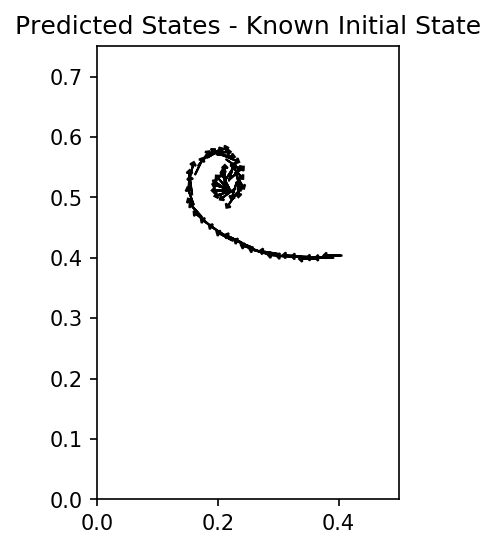

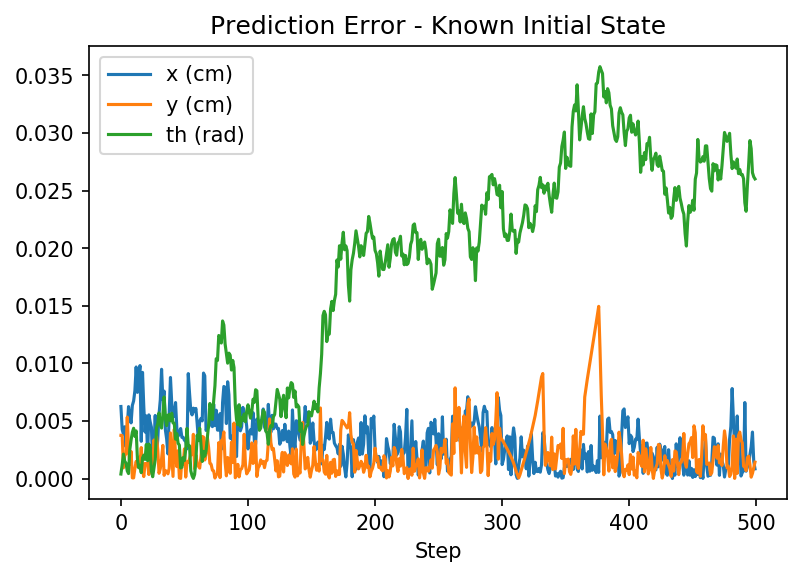

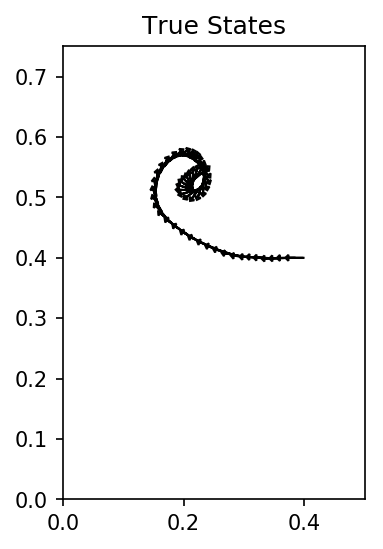

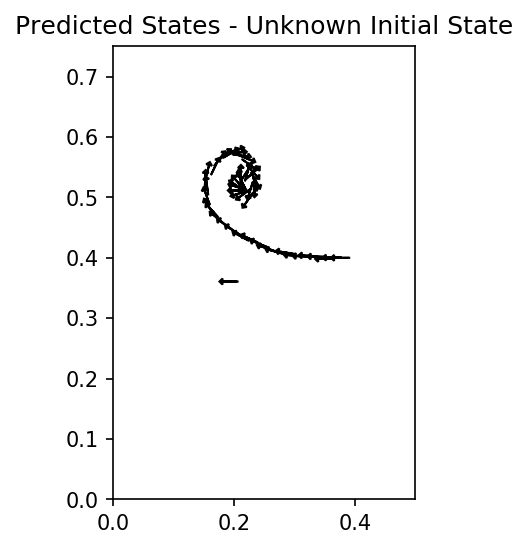

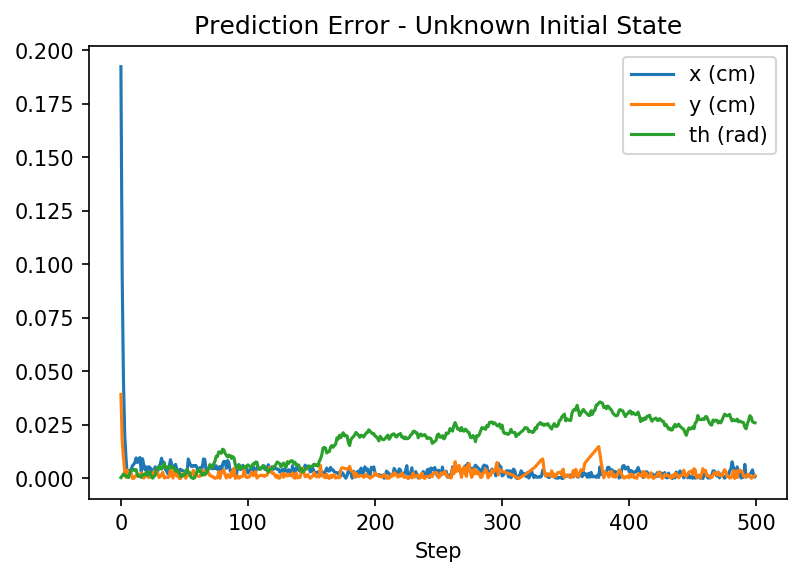

In [7]:
control_seq = [[60,60]]*500
init_state = [0.4,0.4,np.pi/2,0]
state_seq,obs_seq = generate_measurement(init_state,control_seq,seed = 2)
eval_one_traj(control_seq,init_state,obs_seq);
eval_one_traj_unknown(control_seq,obs_seq);

MSE [0.00307123 0.00278866 0.00915801]


/home/samer/Documents/Subjects/2019 Fall/ECE 2019 AS - Computational Robotics/ece_209as_lab3/my_lib.py:62: RuntimeWarning: divide by zero encountered in double_scalars
  get_dist_y = lambda x :  [(x - state[1])/ np.sin(state[2]), (x - state[1])/ np.sin(state[2]+pi/2)]


MSE [0.00887153 0.00324226 0.00915801]


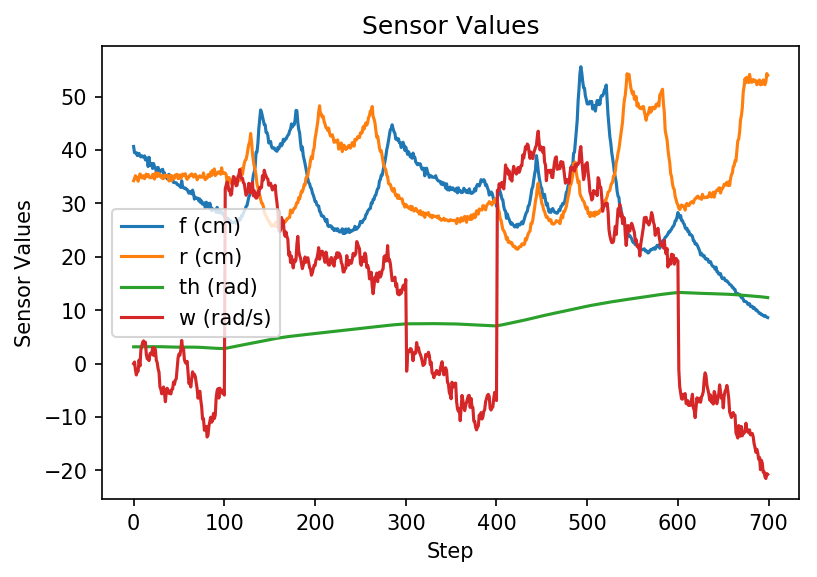

<Figure size 900x600 with 0 Axes>

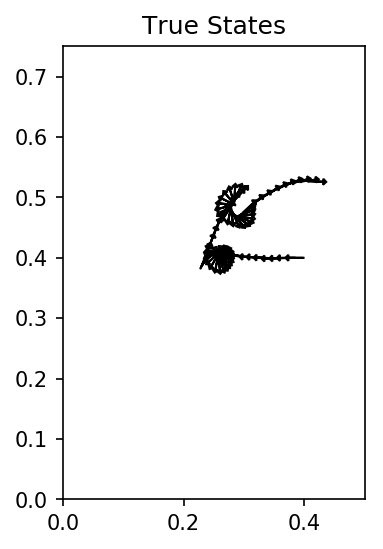

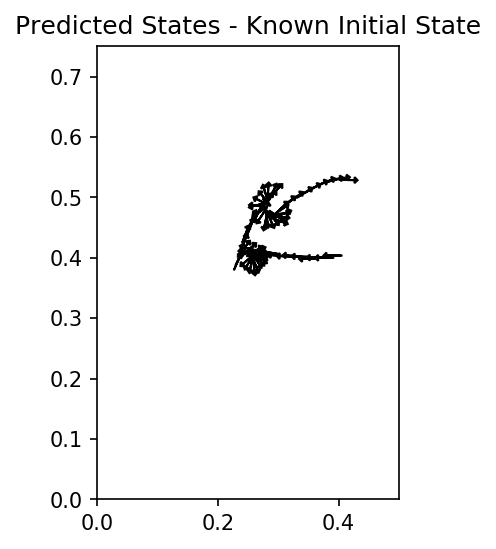

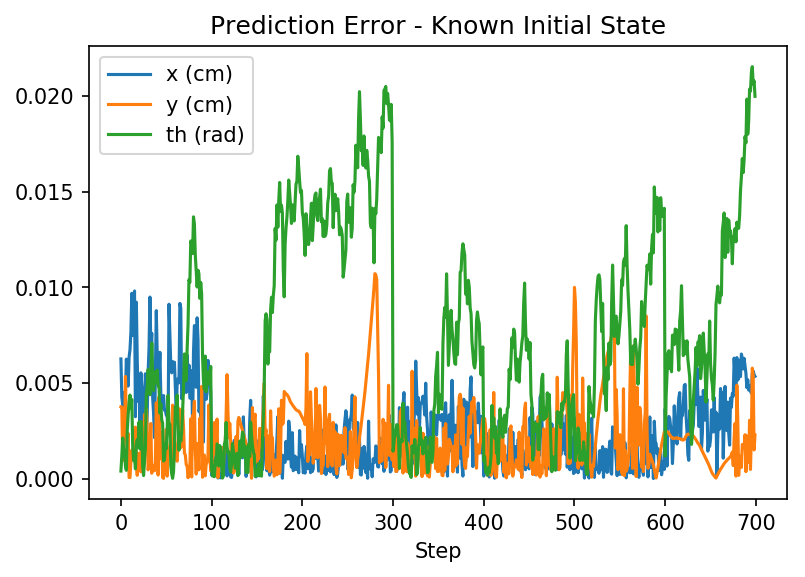

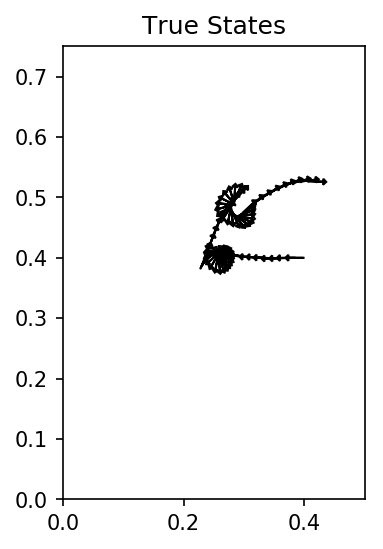

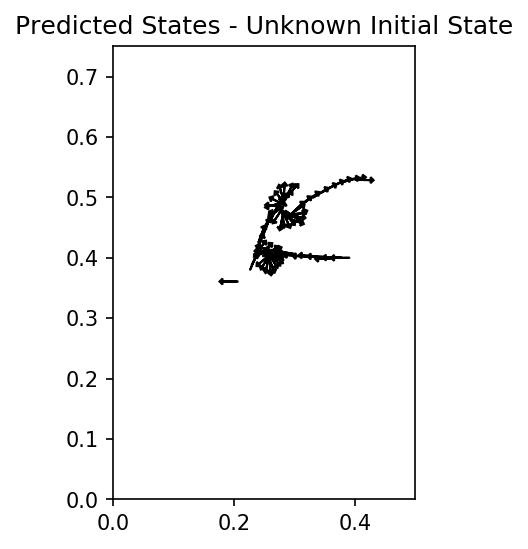

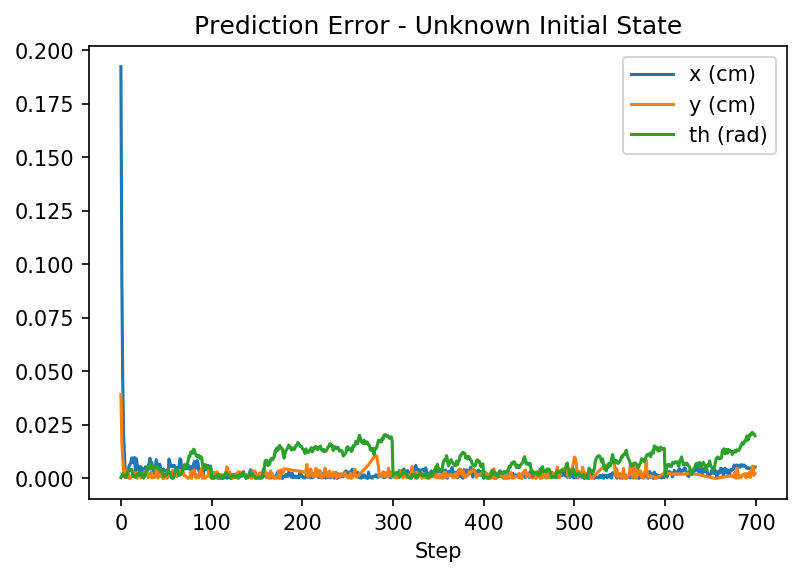

In [8]:
control_seq = [[60,60]]*100 +  [[-60,60]]*200 + [[60,60]]*100 +  [[-60,60]]*200 + [[60,60]]*100 
init_state = [0.4,0.4,np.pi/2,0]
state_seq,obs_seq = generate_measurement(init_state,control_seq,seed = 2)
eval_one_traj(control_seq,init_state,obs_seq);
eval_one_traj_unknown(control_seq,obs_seq);

In [9]:
for _ in range(100):
    print()